In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
midsf = np.zeros(708)
mid2m = np.zeros(708)

In [3]:
years = [f"{x:04d}" for x in range(1958,2017)]
i=0

In [4]:
for yy in years:
    data=nc.Dataset('./ta_oaflux_'+yy+'.nc')
    plotvar = data.variables['tmp2m'][:,:]
    n = i*12
    nn = (i+1)*12
    mid2m[n:nn] = plotvar[:,90,0]
    i=i+1

In [5]:
i=0
for yy in years:
    data=nc.Dataset('./ts_oaflux_'+yy+'.nc')
    plotvar = data.variables['tmpsf'][:,:]
    n = i*12
    nn = (i+1)*12
    midsf[n:nn] = plotvar[:,90,0]
    i=i+1


In [6]:
err = midsf - mid2m

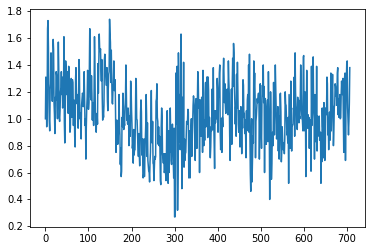

In [7]:
plt.plot(err)

In [8]:
data=nc.Dataset('./lh_oaflux_1958-2016.nc')
plotvar1 = data.variables['lhtfl'][:,:]

In [9]:
lon = data.variables['lon']

In [10]:
lat = data.variables['lat']

In [11]:
lat[90]

masked_array(data=0.5,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [12]:
lon

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    long_name: longitude
    units: degrees
    range: 0.5 to 359.5
unlimited dimensions: 
current shape = (360,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [13]:
lh = plotvar1[:,90,0]

In [14]:
plotvar1.shape

(708, 180, 360)

In [15]:
data=nc.Dataset('./sh_oaflux_1958-2016.nc')
plotvar2 = data.variables['shtfl'][:,:]

In [16]:
sh = plotvar2[:,90,0]

In [17]:
wh = lh + sh

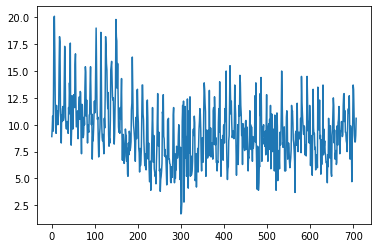

In [18]:
plt.plot(sh)

In [19]:
np.savetxt('sh.out', sh)
np.savetxt('err.out', err)
np.savetxt('wh.out', wh)
np.savetxt('lh.out', lh)

Text(0.5, 1.0, 'Globally averaged annual mean latent heat fluxe')

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


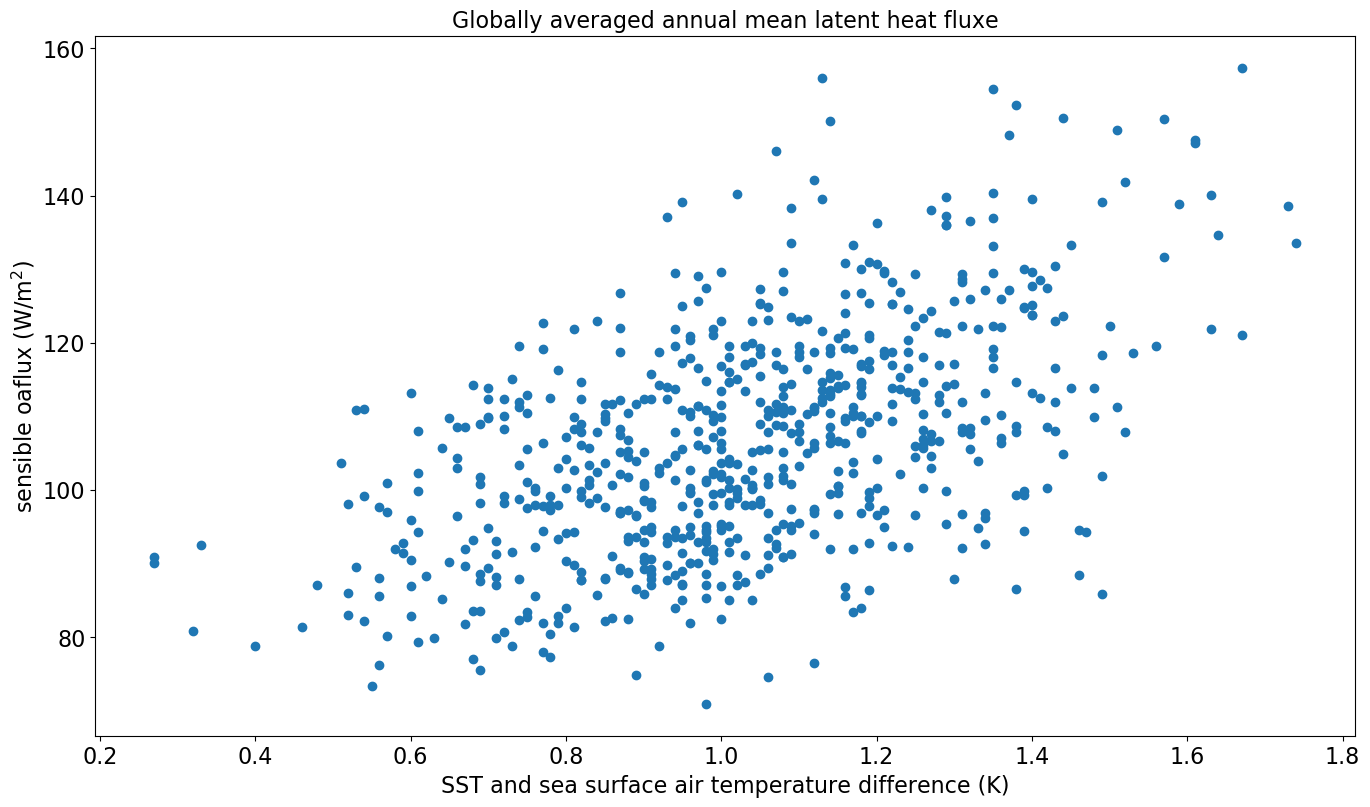

In [20]:
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(18,10), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.scatter(err,lh)

#########################################
plt.xticks(**my_font)
plt.yticks(**my_font)
plt.xlabel('SST and sea surface air temperature difference (K)',**my_font)
plt.ylabel('sensible oaflux (W/m$^2$)',**my_font)
#plt.hlines(mean, 0, 2160, colors = "k",linestyles = "dashed",linewidth=4)
#plt.axis("SST and sea surface air temperature difference (K)")
#plt.plot([0,-ww2[0]],[320,2300])
ax0.set_title('Globally averaged annual mean latent heat fluxe',**my_font)